In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.notebook_repr_html', False)


df_summary = pd.read_csv('fall_summary_cleaned.csv', encoding="CP949")
df_summary

    deviceId    mon  caution  fall
0        #01  23/01     35.0   1.0
1        #01  23/07    130.0   6.0
2        #01  23/08     94.0   3.0
3        #01  23/11     48.0   1.0
4        #01  23/12     54.0   1.0
..       ...    ...      ...   ...
282      #41  23/08    754.0  18.0
283      #41  23/09    218.0   1.0
284      #41  23/10     86.0   0.0
285      #41  23/11     30.0   0.0
286      #41  23/12     47.0   2.0

[287 rows x 4 columns]

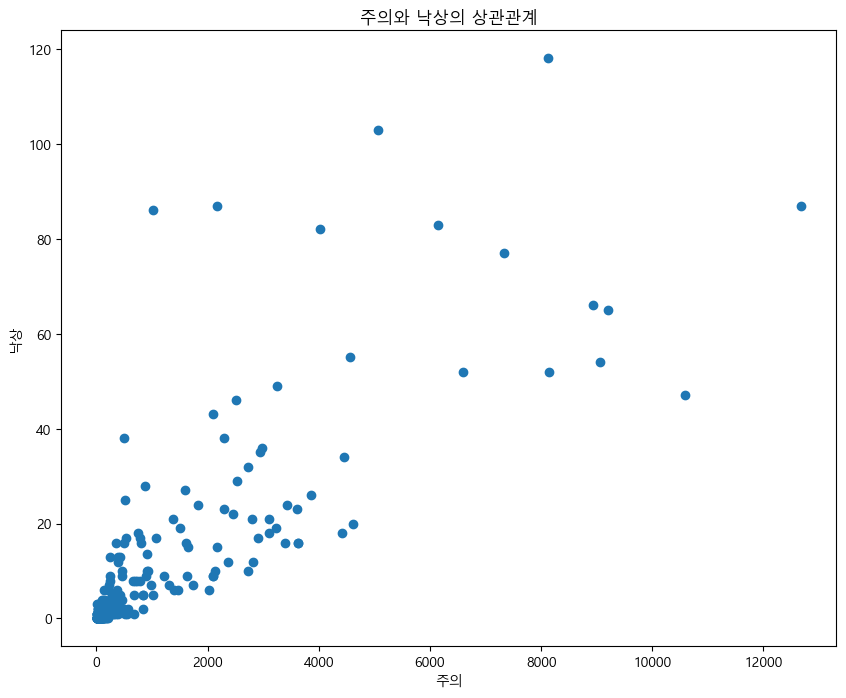

In [14]:
plt.rc('font', family='Malgun Gothic')

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_summary['caution'], df_summary['fall'])
ax.set_xlabel('주의')
ax.set_ylabel('낙상')

plt.title('주의와 낙상의 상관관계')
plt.show()

# 회귀분석하기

In [15]:
# 주의, 낙상 값 추출
X = df_summary.caution.values
Y = df_summary.fall.values

# X, Y를 2d array로 변경
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)


In [16]:
# 회귀분석하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X, Y)

# r 계수
print (lr.coef_[0])
# y 절편
print (lr.intercept_)

[0.0080895]
[1.80248273]


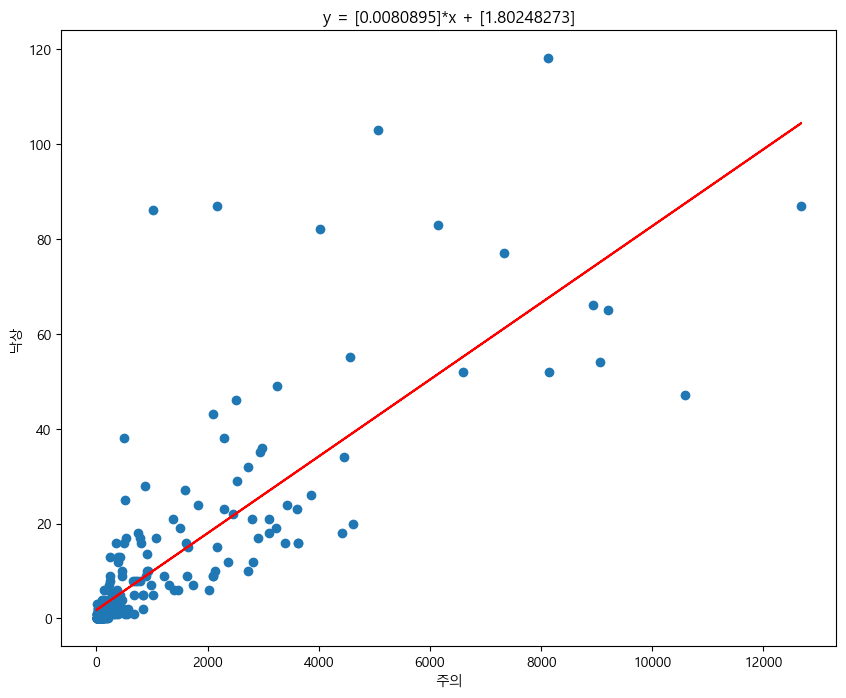

In [17]:
NewY = lr.coef_[0]*X +lr.intercept_

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X, Y)
ax.set_xlabel('주의')
ax.set_ylabel('낙상')

plt.plot(X, NewY, color='red')
plt.title('y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))
plt.show()

In [20]:
#pip install statsmodels
import statsmodels.api as sm
pd.set_option('display.notebook_repr_html', False)

res = sm.OLS(Y, sm.add_constant(X)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     559.0
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           3.75e-69
Time:                        11:26:13   Log-Likelihood:                -1085.0
No. Observations:                 287   AIC:                             2174.
Df Residuals:                     285   BIC:                             2181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8025      0.700      2.575      0.011       0.425       3.180
x1             0.0081      0.000     23.643      0.000       0.007       0.009
==============================================================================
Omnibus:                      254.970   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5762.432
Skew:                           3.562   Prob(JB):                         0.00
Kurtosis:                      23.764   Cond. No.                     2.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
0.0080895 * 50 + 1.80248273

2.20695773